In [671]:
n=100
m=200
epsilon=0.05
alpha = 0.1
beta = 0.7

In [672]:
import numpy as np

a = np.random.randn(m, n)

Exact solution

In [674]:
import cvxpy as cp

x = cp.Variable(n)

objective = cp.Minimize(-1 * cp.sum([cp.log(1-(a[i] @ x)) for i in range(m)]) - cp.sum([cp.log(1-(x[i]**2)) for i in range(n)]))
problem = cp.Problem(objective)
problem.solve()

-160.96348108458392

In [675]:
x.value

array([ 0.8790482 ,  0.25082146, -0.50748377,  0.42202604, -0.79464571,
        0.11382662, -0.57416074, -0.16473435,  0.69134686, -0.67254261,
        0.83888812,  0.38499307, -0.36260453, -0.16381762, -0.35691968,
        0.06683574,  0.32529857,  0.33946635,  0.344449  , -0.26593522,
        0.53700868, -0.01963185,  0.11772794,  0.14219234, -0.51650358,
       -0.2168203 , -0.80655126,  0.2203761 ,  0.79901213,  0.80659515,
       -0.37027907, -0.21481593, -0.01094094,  0.30165413,  0.01205929,
       -0.22125695,  0.32365907,  0.68006584, -0.65177982,  0.67142663,
       -0.09365475,  0.81019084,  0.56551577,  0.66665911, -0.42224947,
       -0.31019657,  0.45429545, -0.32459415,  0.62026597, -0.45582318,
        0.25084731,  0.26597048,  0.27132253,  0.37121935,  0.74189364,
       -0.37188984, -0.12134344, -0.03335406, -0.57002154, -0.20562137,
        0.2929379 ,  0.03080793, -0.89803693, -0.49685972,  0.28403004,
       -0.68749947, -0.05078406,  0.10178276,  0.10242085, -0.37

Gradient descent

In [676]:
iteration = 0
x = np.array([0 for i in range(n)])
obj = []
while(True):
    grad_f = np.array([np.sum(np.array([a[i][j]/(1-(a[i] @ x)) for i in range(m)])) for j in range(n)]) + np.array([2 * x[j]/(1-(x[j]**2)) for j in range(n)])
    delta_x = -1 * grad_f
    if (np.linalg.norm(grad_f) < epsilon):
        break
    print("Iteration ", iteration, ": ", np.linalg.norm(grad_f))
    
    t=1
    iteration += 1

    while(True):
        k=0
        for i in range(m):
            if 1-(a[i] @ (x + t * delta_x)) < 0:
                # print("violated since ", 1-(a[i] @ (x + t * delta_x)))
                t = beta * t
                k=1
                break
        if k==0:
            break
    while(True):
        k=0
        for i in range(n):
            if 1-((x[i]+t*delta_x[i])**2) < 0:
                # print("violated since ", 1-((x[i]+t*delta_x[i])**2))
                t = beta * t
                k=1
                break
        if k==0:
            break

    while(True): 
        f_xptd = -1 * np.sum(np.array([np.log(1-(a[i] @ (x + t * delta_x))) for i in range(m)])) - np.sum(np.array([np.log(1-((x[i]+t*delta_x[i])**2)) for i in range(n)]))
        f_x = -1 * np.sum(np.array([np.log(1-(a[i] @ x)) for i in range(m)])) - np.sum(np.array([np.log(1-(x[i]**2)) for i in range(n)]))

        if f_xptd > f_x+ alpha * t * (grad_f @ delta_x):
            t = beta * t
        else: break
    obj = obj + [f_x]

    x = x + t * delta_x


Iteration  0 :  140.1302695378443
Iteration  1 :  91.1637285838735
Iteration  2 :  100.78243236265537
Iteration  3 :  103.57925327320103
Iteration  4 :  84.50959167178273
Iteration  5 :  55.298655972026545
Iteration  6 :  71.05261510581363
Iteration  7 :  2858.3935205077773
Iteration  8 :  81.426256918792
Iteration  9 :  66.65867441870166
Iteration  10 :  162.95627275036293
Iteration  11 :  45.21286431904418
Iteration  12 :  51.606847999717175
Iteration  13 :  59.08425744746839
Iteration  14 :  38.550139032675666
Iteration  15 :  423.93956165135637
Iteration  16 :  44.98067909243628
Iteration  17 :  131.5487679055429
Iteration  18 :  37.988397752284115
Iteration  19 :  168.88683760949988
Iteration  20 :  31.360518062688435
Iteration  21 :  170.89241962062044
Iteration  22 :  29.03229754679089
Iteration  23 :  95.51231532626248
Iteration  24 :  30.097880514951047
Iteration  25 :  293.66576410261456
Iteration  26 :  24.844835581674413
Iteration  27 :  68.32522961781552
Iteration  28 :  3

In [677]:
x

array([ 0.87907279,  0.25083739, -0.50769383,  0.4222941 , -0.79481953,
        0.1138452 , -0.5742169 , -0.16478732,  0.69159868, -0.67281895,
        0.83866612,  0.38502975, -0.36239752, -0.16381781, -0.3565295 ,
        0.06720603,  0.32531801,  0.33925966,  0.3437172 , -0.26549107,
        0.53657375, -0.0199826 ,  0.11763679,  0.14181968, -0.51587955,
       -0.21689503, -0.80653671,  0.22075324,  0.79872278,  0.80634418,
       -0.37043577, -0.21423711, -0.01066119,  0.30096529,  0.01281916,
       -0.22083436,  0.32298755,  0.67972697, -0.65145708,  0.67148008,
       -0.09454939,  0.81001533,  0.56543329,  0.6665402 , -0.42191977,
       -0.30998898,  0.45379453, -0.32439078,  0.6203451 , -0.4552916 ,
        0.25094652,  0.2661023 ,  0.27107629,  0.37105138,  0.74198989,
       -0.37168365, -0.12149383, -0.03309276, -0.57040881, -0.20578304,
        0.29240205,  0.03063766, -0.89809374, -0.49685688,  0.2841975 ,
       -0.68727444, -0.05062196,  0.10152267,  0.10174758, -0.37

In [678]:
p_hat = -160.96348108458392

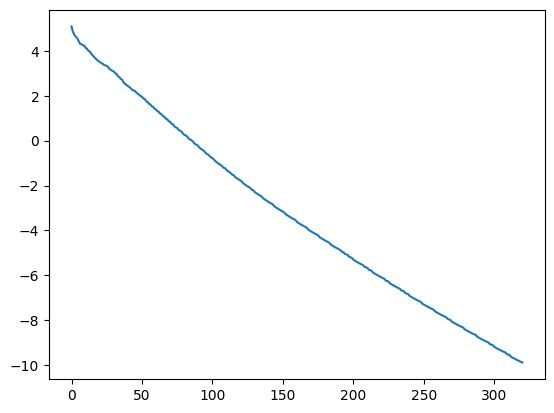

In [679]:
import matplotlib.pyplot as plt

plt.plot(np.log(obj -np.array(p_hat)))

Newton's method

In [ ]:
iteration = 0
x = np.array([0 for i in range(n)])
obj = []
while(True):
    grad_f = np.array([np.sum(np.array([a[i][j]/(1-(a[i] @ x)) for i in range(m)])) for j in range(n)]) + np.array([2 * x[j]/(1-(x[j]**2)) for j in range(n)])
    delta_x = -1 * sci.linalg.inv((a.T @ np.array(np.diag([1/((1-(a[i]@x))**2) for i in range(m)])) @ a) + np.diag(np.array([((2*(x[j]**2)+2)/(1-x[j]**2)) for j in range(n)]))) @ grad_f
    lmbda = grad_f.T @ sci.linalg.inv((a.T @ np.array(np.diag([1/((1-(a[i]@x))**2) for i in range(m)])) @ a) + np.diag(np.array([((2*(x[j]**2)+2)/(1-x[j]**2)) for j in range(n)]))) @ grad_f
    if (lmbda < 0.01):
        break
    print("Iteration ", iteration, ": ", np.linalg.norm(grad_f), "lambda: ", lmbda)
    
    t=1
    iteration += 1

    while(True):
        k=0
        for i in range(m):
            if 1-(a[i] @ (x + t * delta_x)) < 0:
                # print("violated since ", 1-(a[i] @ (x + t * delta_x)))
                t = beta * t
                k=1
                break
        if k==0:
            break
    while(True):
        k=0
        for i in range(n):
            if 1-((x[i]+t*delta_x[i])**2) < 0:
                # print("violated since ", 1-((x[i]+t*delta_x[i])**2))
                t = beta * t
                k=1
                break
        if k==0:
            break

    while(True): 
        f_xptd = -1 * np.sum(np.array([np.log(1-(a[i] @ (x + t * delta_x))) for i in range(m)])) - np.sum(np.array([np.log(1-((x[i]+t*delta_x[i])**2)) for i in range(n)]))
        f_x = -1 * np.sum(np.array([np.log(1-(a[i] @ x)) for i in range(m)])) - np.sum(np.array([np.log(1-(x[i]**2)) for i in range(n)]))

        if f_xptd > f_x+ alpha * t * (grad_f @ delta_x):
            t = beta * t
        else: break
    obj = obj + [f_x]
    print(grad_f @ delta_x)
    x = x + t * delta_x
    if iteration == 1200:
        break


Iteration  0 :  130.38894578876665 lambda:  81.14894133860867
-81.14894133860867
Iteration  1 :  72.39300944958043 lambda:  63.04351372978541
-63.04351372978542
Iteration  2 :  37.966775357855084 lambda:  24.1329982961655
-24.132998296165503
Iteration  3 :  26.379105030373346 lambda:  7.537905592997182
-7.537905592997182
Iteration  4 :  14.110224868439685 lambda:  3.6818691376179453
-3.681869137617942
Iteration  5 :  40.048876841010454 lambda:  12.24270642146855
-12.242706421468554
Iteration  6 :  5.837896641766023 lambda:  0.5491499517536306
-0.5491499517536307
Iteration  7 :  3.18981073914208 lambda:  0.16051771172883184
-0.16051771172883186
Iteration  8 :  2.0133687626813606 lambda:  0.05495803314984504
-0.05495803314984504
Iteration  9 :  1.139879090892699 lambda:  0.01947782382135421
-0.019477823821354198


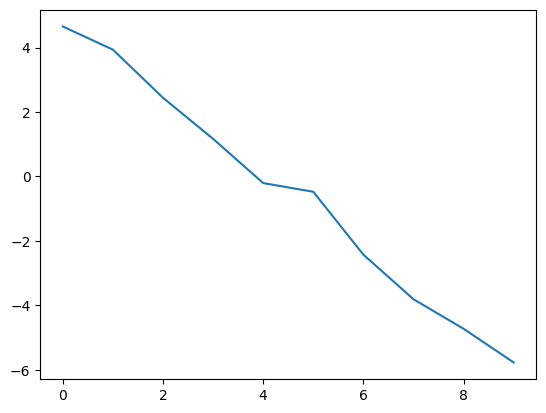

In [ ]:
import matplotlib.pyplot as plt

plt.plot(np.log(obj -np.array(p_hat)))

In [ ]:
x

array([-0.16984447,  0.45024793, -0.32218526, -0.60725703,  0.26174248,
        0.34384604,  0.25783191,  0.0645775 , -0.11143492, -0.1082341 ,
       -0.65530748,  0.15268971, -0.10360412, -0.31018336, -0.43749853,
        0.44154166, -0.06433535,  0.1604601 , -0.08474838, -0.61048802,
        0.16521716, -0.03235335, -0.00456604, -0.3629195 ,  0.02786094,
        0.21092208, -0.93293816,  0.0193245 ,  0.59192505, -0.37783168,
        0.19709573,  0.24446843, -0.31070489, -0.03535688, -0.45473805,
       -0.06498148,  0.22499888,  0.22482406, -0.13899244, -0.1665399 ,
       -0.00453208,  0.06990249,  0.05890311, -0.04417686,  0.49166525,
        0.14742016, -0.07770639, -0.34464673, -0.18127023,  0.25992205,
       -0.80078734, -0.5161432 ,  0.29988898,  0.23564145, -0.12424259,
       -0.18217768, -0.22026255,  0.41873423,  0.31615499, -0.5644967 ,
       -0.18371334, -0.07301377, -0.23857608, -0.11277547,  0.66998501,
        0.12762936,  0.2042929 , -0.77521869, -0.34753708,  0.25

Approximating Hessian

In [ ]:
iteration = 0
x = np.array([0 for i in range(n)])
obj = []
while(True):
    grad_f = np.array([np.sum(np.array([a[i][j]/(1-(a[i] @ x)) for i in range(m)])) for j in range(n)]) + np.array([2 * x[j]/(1-(x[j]**2)) for j in range(n)])
    if iteration % 5 == 0:
        Hessian = (a.T @ np.array(np.diag([1/((1-(a[i]@x))**2) for i in range(m)])) @ a) + np.diag(np.array([((2*(x[j]**2)+2)/(1-x[j]**2)) for j in range(n)]))
        inv_Hessian = sci.linalg.inv(Hessian)
    delta_x = -1 * inv_Hessian @ grad_f

    lmbda = grad_f.T @ inv_Hessian @ grad_f
    if (lmbda < 0.01):
        break
    print("Iteration ", iteration, ": ", np.linalg.norm(grad_f), "lambda: ", lmbda)
    
    t=1
    iteration += 1

    while(True):
        k=0
        for i in range(m):
            if 1-(a[i] @ (x + t * delta_x)) < 0:
                # print("violated since ", 1-(a[i] @ (x + t * delta_x)))
                t = beta * t
                k=1
                break
        if k==0:
            break
    while(True):
        k=0
        for i in range(n):
            if 1-((x[i]+t*delta_x[i])**2) < 0:
                # print("violated since ", 1-((x[i]+t*delta_x[i])**2))
                t = beta * t
                k=1
                break
        if k==0:
            break

    while(True): 
        f_xptd = -1 * np.sum(np.array([np.log(1-(a[i] @ (x + t * delta_x))) for i in range(m)])) - np.sum(np.array([np.log(1-((x[i]+t*delta_x[i])**2)) for i in range(n)]))
        f_x = -1 * np.sum(np.array([np.log(1-(a[i] @ x)) for i in range(m)])) - np.sum(np.array([np.log(1-(x[i]**2)) for i in range(n)]))

        if f_xptd > f_x+ alpha * t * (grad_f @ delta_x):
            t = beta * t
        else: break
    obj = obj + [f_x]
    print(grad_f @ delta_x)
    x = x + t * delta_x
    if iteration == 1200:
        break


Iteration  0 :  130.38894578876665 lambda:  81.14894133860867
-81.14894133860867
Iteration  1 :  72.39300944958043 lambda:  21.95724417905338
-21.957244179053383
Iteration  2 :  54.42668954001951 lambda:  15.647133068561065
-15.647133068561061
Iteration  3 :  252.68675988121979 lambda:  289.46190362540045
-289.4619036254004
Iteration  4 :  44.09669634000655 lambda:  9.260066651087374
-9.260066651087378
Iteration  5 :  158.8709582001218 lambda:  41.402295152768644
-41.40229515276867
Iteration  6 :  92.77934324584032 lambda:  17.164283941196466
-17.164283941196448
Iteration  7 :  75.7901164461996 lambda:  7.919450686514383
-7.91945068651438
Iteration  8 :  68.41241576597898 lambda:  12.402701237870877
-12.402701237870884
Iteration  9 :  59.51047746165718 lambda:  2.437314720548919
-2.437314720548919
Iteration  10 :  62.06673218962269 lambda:  8.135173827327502
-8.135173827327497
Iteration  11 :  37.25722178093836 lambda:  1.0979068295777565
-1.097906829577756
Iteration  12 :  21.96764899

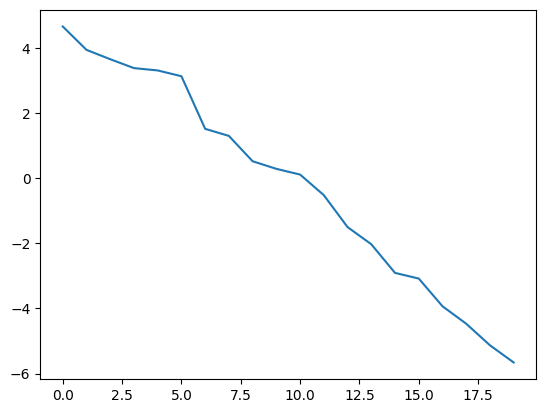

In [ ]:
import matplotlib.pyplot as plt

plt.plot(np.log(obj -np.array(p_hat)))

When you only update the Hessain every 5 iterations, it just takes a bit longer

In [ ]:
iteration = 0
x = np.array([0 for i in range(n)])
obj = []
while(True):
    grad_f = np.array([np.sum(np.array([a[i][j]/(1-(a[i] @ x)) for i in range(m)])) for j in range(n)]) + np.array([2 * x[j]/(1-(x[j]**2)) for j in range(n)])
    delta_x = -1 * sci.linalg.inv(np.diag(np.array([((2*(x[j]**2)+2)/(1-x[j]**2)) for j in range(n)]))) @ grad_f
    lmbda = grad_f.T @ sci.linalg.inv(np.diag(np.array([((2*(x[j]**2)+2)/(1-x[j]**2)) for j in range(n)]))) @ grad_f
    if (lmbda < 0.01):
        break
    print("Iteration ", iteration, ": ", np.linalg.norm(grad_f), "lambda: ", lmbda)
    
    t=1
    iteration += 1

    while(True):
        k=0
        for i in range(m):
            if 1-(a[i] @ (x + t * delta_x)) < 0:
                # print("violated since ", 1-(a[i] @ (x + t * delta_x)))
                t = beta * t
                k=1
                break
        if k==0:
            break
    while(True):
        k=0
        for i in range(n):
            if 1-((x[i]+t*delta_x[i])**2) < 0:
                # print("violated since ", 1-((x[i]+t*delta_x[i])**2))
                t = beta * t
                k=1
                break
        if k==0:
            break

    while(True): 
        f_xptd = -1 * np.sum(np.array([np.log(1-(a[i] @ (x + t * delta_x))) for i in range(m)])) - np.sum(np.array([np.log(1-((x[i]+t*delta_x[i])**2)) for i in range(n)]))
        f_x = -1 * np.sum(np.array([np.log(1-(a[i] @ x)) for i in range(m)])) - np.sum(np.array([np.log(1-(x[i]**2)) for i in range(n)]))

        if f_xptd > f_x+ alpha * t * (grad_f @ delta_x):
            t = beta * t
        else: break
    obj = obj + [f_x]
    print(grad_f @ delta_x)
    x = x + t * delta_x
    if iteration == 1200:
        break


Iteration  0 :  130.38894578876665 lambda:  8500.638591952964
-8500.638591952964
Iteration  1 :  90.57959032849902 lambda:  4079.0400208730343
-4079.0400208730343
Iteration  2 :  124.80457508682117 lambda:  7730.465201572507
-7730.465201572507
Iteration  3 :  75.87735328138913 lambda:  2792.7391940064426
-2792.7391940064426
Iteration  4 :  82.42532410212235 lambda:  3340.0152120097537
-3340.0152120097537
Iteration  5 :  47.86621438425667 lambda:  1073.001496174048
-1073.001496174048
Iteration  6 :  71.95685773262487 lambda:  2527.32325173983
-2527.32325173983
Iteration  7 :  176.07957756231875 lambda:  14924.66267069556
-14924.66267069556
Iteration  8 :  38.86871708136559 lambda:  688.891467576098
-688.891467576098
Iteration  9 :  152.2839158304901 lambda:  11124.962633841504
-11124.962633841504
Iteration  10 :  42.0721337269906 lambda:  833.8959226059862
-833.8959226059862
Iteration  11 :  120.3390446425545 lambda:  6868.074277483543
-6868.074277483543
Iteration  12 :  37.829686986485

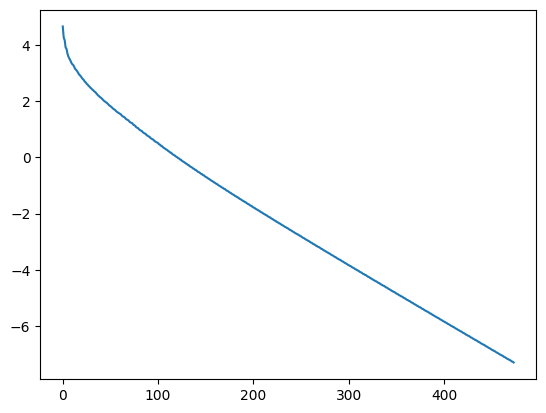

In [ ]:
import matplotlib.pyplot as plt

plt.plot(np.log(obj -np.array(p_hat)))

When we only use the diagonal matrix, the convergence gets very crude, but it still works!

## 1. Three way separation

In [ ]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

# Data for problem instance
M, N, P = 20, 20, 20

X = np.array([
    [3.5674, 4.1253, 2.8535, 5.1892, 4.3273, 3.8133, 3.4117, 3.8636, 5.0668, 3.9044, 4.2944, 4.7143, 3.3082, 5.2540, 2.5590, 3.6001, 4.8156, 5.2902, 5.1908, 3.9802],
    [-2.9981, 0.5178, 2.1436, -0.0677, 0.3144, 1.3064, 3.9297, 0.2051, 0.1067, -1.4982, -2.4051, 2.9224, 1.5444, -2.8687, 1.0281, 1.2420, 1.2814, 1.2035, -2.1644, -0.2821]])

Y = np.array([
    [-4.5665, -3.6904, -3.2881, -1.6491, -5.4731, -3.6170, -1.1876, -1.0539, -1.3915, -2.0312, -1.9999, -0.2480, -1.3149, -0.8305, -1.9355, -1.0898, -2.6040, -4.3602, -1.8105, 0.3096],
    [2.4117, 4.2642, 2.8460, 0.5250, 1.9053, 2.9831, 4.7079, 0.9702, 0.3854, 1.9228, 1.4914, -0.9984, 3.4330, 2.9246, 3.0833, 1.5910, 1.5266, 1.6256, 2.5037, 1.4384]])

Z = np.array([
    [1.7451, 2.6345, 0.5937, -2.8217, 3.0304, 1.0917, -1.7793, 1.2422, 2.1873, -2.3008, -3.3258, 2.7617, 0.9166, 0.0601, -2.6520, -3.3205, 4.1229, -3.4085, -3.1594, -0.7311],
    [-3.2010, -4.9921, -3.7621, -4.7420, -4.1315, -3.9120, -4.5596, -4.9499, -3.4310, -4.2656, -6.2023, -4.5186, -3.7659, -5.0039, -4.3744, -5.0559, -3.9443, -4.0412, -5.3493, -3.0465]])


In [ ]:
a_1 = cp.Variable(2)
a_2 = cp.Variable(2)
a_3 = cp.Variable(2)
b_1 = cp.Variable()
b_2 = cp.Variable()
b_3 = cp.Variable()

objective = cp.Minimize(1)
contraints = [a_2.T @ X - b_2 + 1 <= a_1.T @ X - b_1, a_3.T @ X - b_3 + 1 <= a_1.T @ X - b_1, 
              a_1.T @ Y - b_1 + 1 <= a_2.T @ Y - b_2, a_3.T @ Y - b_3 + 1 <= a_2.T @ Y - b_2, 
              a_1.T @ Z - b_1 + 1 <= a_3.T @ Z - b_3, a_2.T @ Z - b_2 + 1 <= a_3.T @ Z - b_3]

problem = cp.Problem(objective, contraints)
problem.solve()

1.0

In [ ]:
import matplotlib.pyplot as plt

t = np.arange(-7, 7, 0.01)


In [ ]:
m_1 = a_1.value - a_2.value
m_2 = a_2.value - a_3.value
m_3 = a_3.value - a_1.value

n_1 = b_1.value - b_2.value
n_2 = b_2.value - b_3.value
n_3 = b_3.value - b_1.value

In [ ]:
line_1 = (-t * m_1[0] + n_1) / m_1[1]
line_2 = (-t * m_2[0] + n_2) / m_2[1]
line_3 = (-t * m_3[0] + n_3) / m_3[1]




In [ ]:
indx1 = np.where((m_2[0] * t + m_2[1] * line_1 - n_2 > 0))[0]
indx2 = np.where((m_3[0] * t + m_3[1] * line_2 - n_3 > 0))[0]
indx3 = np.where((m_1[0] * t + m_1[1] * line_3 - n_1 > 0))[0]

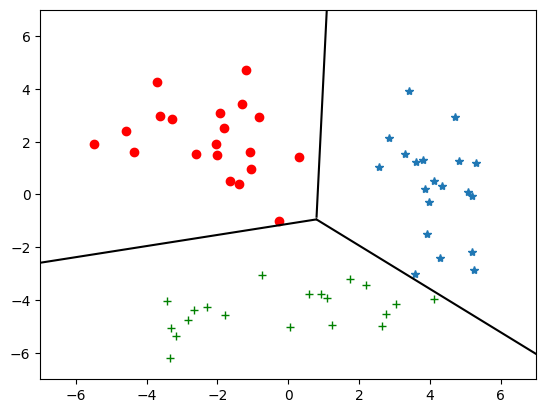

In [ ]:
plt.plot(X[0], X[1], '*', label='X')
plt.plot(Y[0], Y[1], 'ro', label='Y')
plt.plot(Z[0], Z[1], 'g+', label='Z')
plt.plot(t[indx1], line_1[indx1], 'k')
plt.plot(t[indx2], line_2[indx2], 'k')
plt.plot(t[indx3], line_3[indx3], 'k')
plt.axis([-7, 7, -7, 7])
plt.show()

hw7 q2

In [ ]:
k=100
n=2000
delta = 1
eta = 1

In [ ]:
A = np.random.randn(n,k)
b =  np.random.randn(k)

In [ ]:
def create_tridiagonal_matrix(n):
    if n < 2:
        raise ValueError("n must be at least 2")
    
    # Main diagonal
    main_diagonal = np.ones(n) * 6
    main_diagonal[0], main_diagonal[-1] = 4, 4  # Change the first and last elements to 4
    
    # Diagonals above and below the main diagonal
    off_diagonal = np.ones(n - 1) * -2
    
    # Create the tridiagonal matrix
    A = np.diag(main_diagonal) + np.diag(off_diagonal, 1) + np.diag(off_diagonal, -1)
    
    return A

In [ ]:
T = create_tridiagonal_matrix(n)

In [ ]:
2 * sum(b) * sum(A.T) + 2 * A @ b

array([ 368.66742521, -257.79118048, -113.77919135, ...,    4.26238241,
         93.65415276,  348.80902606])

In [ ]:
np.linalg.inv(T + 2 * A @ A.T) @ (2 * sum(b) * sum(A.T) + 2 * A @ b)

array([ 0.09400632, -0.03771327, -0.05209418, ...,  0.00046016,
        0.02492366,  0.09013233])

In [ ]:
(sci.linalg.inv(T) - 2 * sci.linalg.inv(T) @ A @ sci.linalg.inv(np.identity(k) + 2 * A.T @ sci.linalg.inv(T) @ A) @ A.T @ sci.linalg.inv(T) ) @ (2 * sum(b) * sum(A.T) + 2 * A @ b)

array([ 0.09400632, -0.03771327, -0.05209418, ...,  0.00046016,
        0.02492366,  0.09013233])

HW 8 q1

In [399]:
m = 100
n = 400
A = np.random.randn(m, n)
A[5, :] = np.random.uniform(5, 10, n)
x_0 = np.random.uniform(5, 10, n)
b = A @ x_0
c = np.random.randn(n)

In [400]:
x = cp.Variable(n)
objective = cp.Minimize(c @ x - cp.sum(cp.log(x)))
constraints = [A @ x == b]
problem = cp.Problem(objective, constraints)
problem.solve()

-2967.4370022573753

In [401]:
U, Sigma, VT = np.linalg.svd(A, full_matrices=True)
F = VT[m:n, :].T

We can see that the unelimination works as follows.

In [402]:
z = cp.Variable(n-m)
objective = cp.Minimize(c @ (F @ z + x_0) - cp.sum(cp.log((F @ z + x_0))))
problem = cp.Problem(objective)
problem.solve()

-2967.4370229963984

Let us try this using Newton's method (block elimination)

In [403]:
alpha = 0.4
beta = 0.7

In [404]:
iteration = 0
x = x_0
obj = []
while(True):
    grad_f = c - np.array([1/x[i] for i in range(n)])
    Hessian = np.diag(np.array([1/x[i]**2 for i in range(n)]))
    nu = - sci.linalg.inv(A @ sci.linalg.inv(Hessian) @ A.T) @ A @ sci.linalg.inv(Hessian) @ grad_f
    delta_x = sci.linalg.inv(Hessian) @ -(A.T @ nu + grad_f)
    lmbda = delta_x.T @ Hessian @ delta_x
    if (lmbda/2 < 10**(-6)):
        break
    print("Iteration ", iteration, ": ", "lambda: ", lmbda)
    
    t=1
    iteration += 1

    while(True):
        k=0
        for i in range(n):
            if x[i] < 0 or x[i] == 0 or x[i] + t * delta_x[i] <0 or x[i] + t * delta_x[i] == 0:
                print("violated since ", x[i] + t * delta_x[i])
                t = beta * t
                k=1
                break
        if k==0:
            break
    
    print("t after phase 1:", t)
    while(True): 
        f_xptd = c @ (x + t * delta_x) - np.sum([np.log(x[i] + t * delta_x[i]) for i in range(n)])
        f_x = c @ x - np.sum([np.log(x[i]) for i in range(n)])

        if f_xptd > f_x+ alpha * t * (grad_f @ delta_x):
            t = beta * t
        else: break
    obj = obj + [f_x]
    print("t after phase 2:", t)
    x = x + t * delta_x
    if iteration == 1200:
        break


Iteration  0 :  lambda:  15730.011357629854
violated since  -87.76932550071675
violated since  -58.47903882006679
violated since  -37.97583814361183
violated since  -23.623597670093353
violated since  -13.57702933863042
violated since  -6.5444315066063705
violated since  -1.621613024189534
violated since  -4.828766170697582
violated since  -0.5399754981153588
t after phase 1: 0.04035360699999998
t after phase 2: 0.04035360699999998
Iteration  1 :  lambda:  11726.16370115047
violated since  -39.8123769964322
violated since  -26.091143584695892
violated since  -16.486280196480482
violated since  -9.762875824729694
violated since  -5.056492764504142
violated since  -1.7620246223462575
violated since  -0.37437715728241905
t after phase 1: 0.08235429999999996
t after phase 2: 0.08235429999999996
Iteration  2 :  lambda:  5817.7436726601245
violated since  -5.380290259241603
violated since  -3.1186854414226337
violated since  -1.5355620689493557
violated since  -0.42737570821806115
violated s

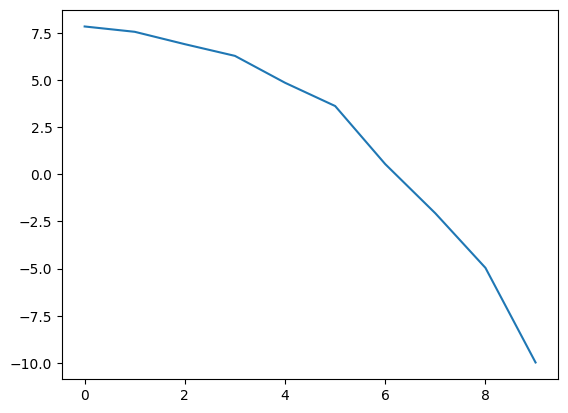

In [406]:
plt.plot(np.log(np.array(obj)+2967.4370022573753))

Try now via KKT system

In [411]:
iteration = 0
x = x_0
obj = []
while(True):
    grad_f = c - np.array([1/x[i] for i in range(n)])
    Hessian = np.diag(np.array([1/x[i]**2 for i in range(n)]))
    nu = - sci.linalg.inv(A @ sci.linalg.inv(Hessian) @ A.T) @ A @ sci.linalg.inv(Hessian) @ grad_f
    KKT_matrix = np.zeros((m+n, m+n))
    KKT_matrix[:n, :n] = Hessian
    KKT_matrix[n:, :n] = A
    KKT_matrix[:n, n:] = A.T
    RHS = np.zeros(m+n)
    RHS[:n] = -grad_f
    delta_x = (sci.linalg.inv(KKT_matrix) @ RHS)[:n]
    lmbda = delta_x.T @ Hessian @ delta_x
    if (lmbda/2 < 10**(-6)):
        break
    print("Iteration ", iteration, ": ", "lambda: ", lmbda)
    
    t=1
    iteration += 1

    while(True):
        k=0
        for i in range(n):
            if x[i] < 0 or x[i] == 0 or x[i] + t * delta_x[i] <0 or x[i] + t * delta_x[i] == 0:
                print("violated since ", x[i] + t * delta_x[i])
                t = beta * t
                k=1
                break
        if k==0:
            break
    
    print("t after phase 1:", t)
    while(True): 
        f_xptd = c @ (x + t * delta_x) - np.sum([np.log(x[i] + t * delta_x[i]) for i in range(n)])
        f_x = c @ x - np.sum([np.log(x[i]) for i in range(n)])

        if f_xptd > f_x+ alpha * t * (grad_f @ delta_x):
            t = beta * t
        else: break
    obj = obj + [f_x]
    print("t after phase 2:", t)
    x = x + t * delta_x
    if iteration == 1200:
        break

Iteration  0 :  lambda:  15730.011357629843
violated since  -87.76932550071592
violated since  -58.47903882006622
violated since  -37.975838143611426
violated since  -23.62359767009307
violated since  -13.577029338630224
violated since  -6.544431506606232
violated since  -1.6216130241894362
violated since  -4.828766170697548
violated since  -0.539975498115334
t after phase 1: 0.04035360699999998
t after phase 2: 0.04035360699999998
Iteration  1 :  lambda:  11726.163701150464
violated since  -39.812376996432214
violated since  -26.091143584695896
violated since  -16.486280196480475
violated since  -9.76287582472968
violated since  -5.056492764504122
violated since  -1.7620246223462326
violated since  -0.3743771572824439
t after phase 1: 0.08235429999999996
t after phase 2: 0.08235429999999996
Iteration  2 :  lambda:  5817.743672660117
violated since  -5.380290259241686
violated since  -3.118685441422683
violated since  -1.5355620689493819
violated since  -0.42737570821807047
violated si

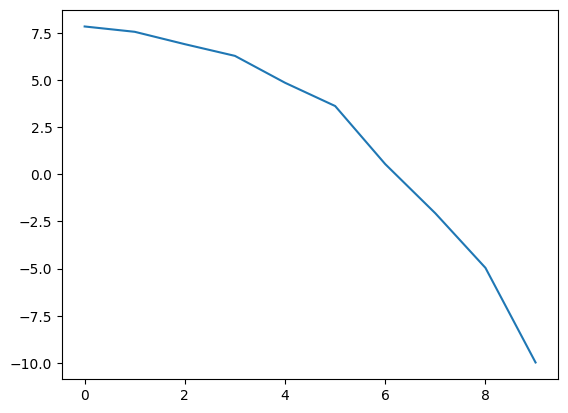

In [412]:
plt.plot(np.log(np.array(obj)+2967.4370022573753))

hw8 p2

In [487]:
m = 100
n = 500
A = np.random.randn(m, n)
A[5, :] = np.random.uniform(5, 10, n)
x_0 = np.random.uniform(5, 10, n)
b = A @ x_0
c = np.random.randn(n)

In [489]:
number_of_neuton

7

In [543]:
mu = 20
epsilon = 0.001
iteration = 0
number_of_neuton = 0
p=1
obj = []
x = x_0
history1 = []
history2 = []
while(True):
    how_many = 0
    while(True):
        grad_f = c - np.array([1/p * 1/x[i] for i in range(n)])
        Hessian = np.diag(np.array([1/p * 1/x[i]**2 for i in range(n)]))
        nu = - sci.linalg.inv(A @ sci.linalg.inv(Hessian) @ A.T) @ A @ sci.linalg.inv(Hessian) @ grad_f
        delta_x = sci.linalg.inv(Hessian) @ -(A.T @ nu + grad_f)
        lmbda = delta_x.T @ Hessian @ delta_x
        if (lmbda/2 < 10**(-5)):
            break
        print("Iteration ", iteration, ": ", "lambda: ", lmbda)
        
        t=1
        iteration += 1

        while(True):
            k=0
            for i in range(n):
                if x[i] < 0 or x[i] == 0 or x[i] + t * delta_x[i] <0 or x[i] + t * delta_x[i] == 0:
                    print("violated since ", x[i] + t * delta_x[i])
                    t = beta * t
                    k=1
                    break
            if k==0:
                break
        
        print("t after phase 1:", t)
        while(True): 
            f_xptd = c @ (x + t * delta_x) - np.sum([1/p * np.log(x[i] + t * delta_x[i]) for i in range(n)])
            f_x = c @ x - np.sum([1/p * np.log(x[i]) for i in range(n)])

            if f_xptd > f_x+ alpha * t * (grad_f @ delta_x):
                t = beta * t
            else: break
        obj = obj + [f_x]
        print("t after phase 2:", t)
        how_many += 1
        x = x + t * delta_x
        if iteration == 1200:
            break
    history1 += [how_many]
    history2 += [m/p]
    number_of_neuton += 1
    if (m/p < epsilon):
        break
    p = mu * p

Iteration  0 :  lambda:  21416.266895987297
violated since  -29.712330437047534
violated since  -18.06887343149925
violated since  -9.91845352761545
violated since  -4.213159594896789
violated since  -0.21945384199372775
violated since  -2.610429473416154
violated since  -10.307164665192396
violated since  -4.6807629732465745
violated since  -0.7422817888844975
t after phase 1: 0.04035360699999998
t after phase 2: 0.04035360699999998
Iteration  1 :  lambda:  18233.176219850397
violated since  -6.334057413487633
violated since  -1.8416258577142237
violated since  -3.626019849235405
violated since  -0.18007467972920743
violated since  -4.340596795729267
violated since  -0.7785153706997558
violated since  -1.4771397325078723
violated since  -0.27980243179632325
t after phase 1: 0.05764800999999997
t after phase 2: 0.05764800999999997
Iteration  2 :  lambda:  13268.555530414362
violated since  -14.255824315631896
violated since  -7.645842428466748
violated since  -3.018855107451145
violate

mu=5

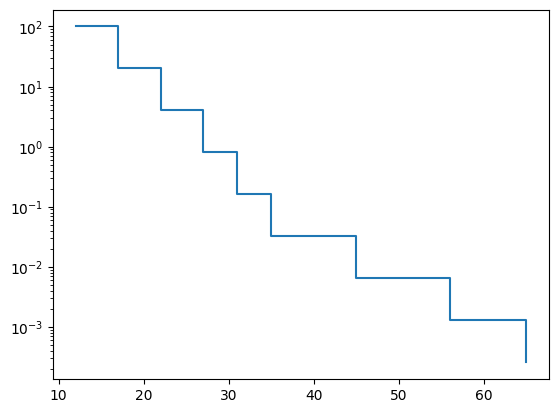

In [538]:
# Compute the cumulative sum of history1
xx = np.cumsum(history1)

# Ensure yy starts with the initial value and has one more element than xx
yy = np.hstack((history2))

# Create the stair-step plot
plt.step(xx, yy, where='post')

# Set a logarithmic scale for the y-axis
plt.yscale('log')

# Display the plot
plt.show()

mu=3

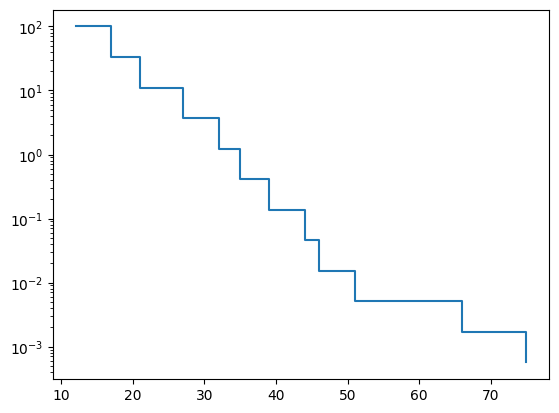

In [540]:
# Compute the cumulative sum of history1
xx = np.cumsum(history1)

# Ensure yy starts with the initial value and has one more element than xx
yy = np.hstack((history2))

# Create the stair-step plot
plt.step(xx, yy, where='post')

# Set a logarithmic scale for the y-axis
plt.yscale('log')

# Display the plot
plt.show()

mu=20

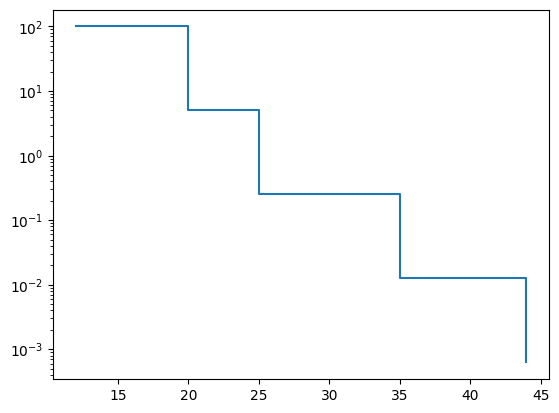

In [544]:
# Compute the cumulative sum of history1
xx = np.cumsum(history1)

# Ensure yy starts with the initial value and has one more element than xx
yy = np.hstack((history2))

# Create the stair-step plot
plt.step(xx, yy, where='post')

# Set a logarithmic scale for the y-axis
plt.yscale('log')

# Display the plot
plt.show()

Let's see what the solution is

In [500]:
k = cp.Variable(n)
objective = cp.Minimize(c @ k)
contraints = [A @ k == b, k >= 0]
problem = cp.Problem(objective, contraints)
problem.solve()

-4980.576019401374

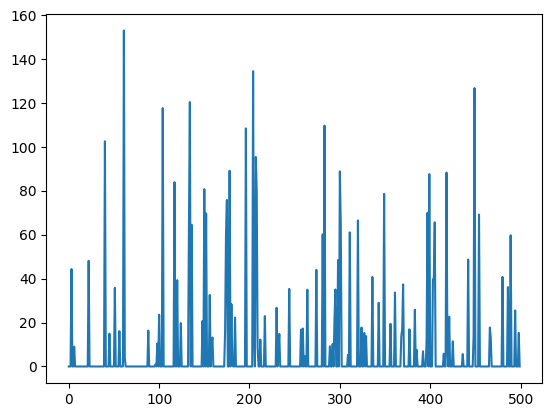

In [508]:
plt.plot(k.value)

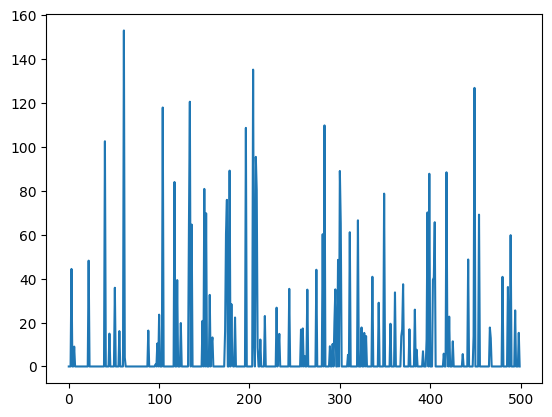

In [509]:
plt.plot(x)

Clearly, it works. We can now create a LP solver function

In [515]:
def LP_solver(A, b, c, x_0):
    """
    LP solver
    This solves minimizing c^T x
    subject to Ax = b, x >= 0
    """
    mu = 3
    epsilon = 0.001
    iteration = 0
    p=1
    x = x_0
    m = A.shape[0]
    n = A.shape[1]
    while(True):
        while(True):
            grad_f = c - np.array([1/p * 1/x[i] for i in range(n)])
            Hessian = np.diag(np.array([1/p * 1/x[i]**2 for i in range(n)]))
            nu = - sci.linalg.inv(A @ sci.linalg.inv(Hessian) @ A.T) @ A @ sci.linalg.inv(Hessian) @ grad_f
            delta_x = sci.linalg.inv(Hessian) @ -(A.T @ nu + grad_f)
            lmbda = delta_x.T @ Hessian @ delta_x
            if (lmbda/2 < 10**(-5)):
                break
            
            t=1
            iteration += 1

            while(True):
                k=0
                for i in range(n):
                    if x[i] < 0 or x[i] == 0 or x[i] + t * delta_x[i] <0 or x[i] + t * delta_x[i] == 0:
                        t = beta * t
                        k=1
                        break
                if k==0:
                    break
            
            while(True): 
                f_xptd = c @ (x + t * delta_x) - np.sum([1/p * np.log(x[i] + t * delta_x[i]) for i in range(n)])
                f_x = c @ x - np.sum([1/p * np.log(x[i]) for i in range(n)])

                if f_xptd > f_x+ alpha * t * (grad_f @ delta_x):
                    t = beta * t
                else: break
            x = x + t * delta_x
            if iteration == 200:
                break
        if (m/p < epsilon):
            break
        p = mu * p
    return x

Let's test it

In [510]:
m = 100
n = 500
A = np.random.randn(m, n)
A[5, :] = np.random.uniform(5, 10, n)
x_0 = np.random.uniform(5, 10, n)
b = A @ x_0
c = np.random.randn(n)

In [517]:
x = cp.Variable(n)
objective = cp.Minimize(c @ x)
contraints = [A @ x == b, x >= 0]
problem = cp.Problem(objective, contraints)
problem.solve()

-5094.854857959112

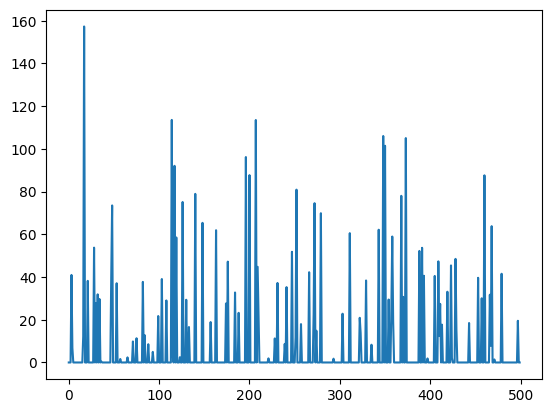

In [518]:
plt.plot(LP_solver(A, b, c, x_0))

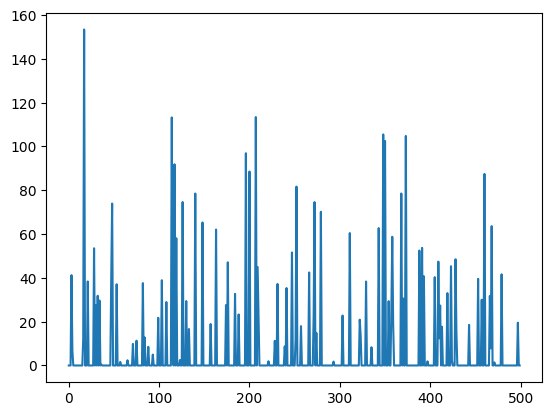

In [519]:
plt.plot(x.value)

hw8 p3 LP solver

In [619]:
def find_feasible_x(A, b):
    # For a given A and b, find a solution
    x = np.linalg.pinv(A) @ b

    j=0
    for i in range(n):
        if x[i] < 0 or x[i] == 0:
            j=1
    if j == 0:
        return x
    
    t = 2 - np.min(x)
    b_tilde = b - A @ np.ones(n)
    A_tilde = np.concatenate((A, -A @ np.ones((n,1))), axis = 1)
    z = x + (t-1) * np.ones(n)
    x_tilde = np.concatenate((z, [t]))
    c_tilde = np.concatenate((np.zeros(n), [1]))
    tt = LP_solver(A_tilde, b_tilde, c_tilde, x_tilde)
    if (tt[n] > 1 or tt[n] == 1):
        return "infeasible"
    else:
        return z[:n]

In [653]:
def LP_solver_general(A, b, c):
    x_0 = find_feasible_x(A, b)
    if (isinstance(x_0, str) and x_0 == "infeasible"):
        return print("infeasible")
    return LP_solver(A, b, c, x_0)

In [666]:
m = 100
n = 500
A = np.random.randn(m, n)
A[5, :] = np.random.uniform(5, 10, n)
x_0 = np.random.uniform(5, 10, n)
b = A @ x_0
c = np.random.randn(n)

In [667]:
LP_solver_general(A, b, c)

array([1.14374626e-05, 6.28629604e+00, 4.28226122e+01, 1.17695677e+00,
       6.73898562e-06, 1.90510338e-06, 5.03244522e-06, 6.21151233e-06,
       1.00090424e+02, 1.86814921e-06, 2.23325574e-06, 7.63917392e+01,
       2.85406513e-06, 1.05887420e-04, 1.45615443e-05, 2.07627040e-06,
       6.79049800e-06, 2.23752938e-05, 3.61282390e-06, 9.08391189e-06,
       8.98363247e-06, 1.85290329e-05, 1.73711028e-06, 3.02626493e-06,
       1.39785832e+01, 1.13615733e-05, 5.45613687e+00, 1.95690285e-06,
       3.04375163e-06, 2.56395112e-06, 4.75206599e-06, 1.78392830e-06,
       1.87829645e-06, 8.25618908e+01, 3.31953388e-06, 8.47485758e-06,
       1.60101675e-06, 1.33909794e-05, 7.00463127e+01, 4.53243406e-06,
       2.38871624e-06, 4.70049276e-06, 1.39114610e-06, 1.96594808e-05,
       3.54281311e-06, 5.05757537e-06, 2.49579166e-06, 2.31113984e-06,
       5.36171120e-06, 2.93647381e-06, 1.83057074e-06, 4.87540880e-06,
       1.96980170e-06, 5.37045946e-06, 6.70496499e+01, 2.46470223e-06,
      

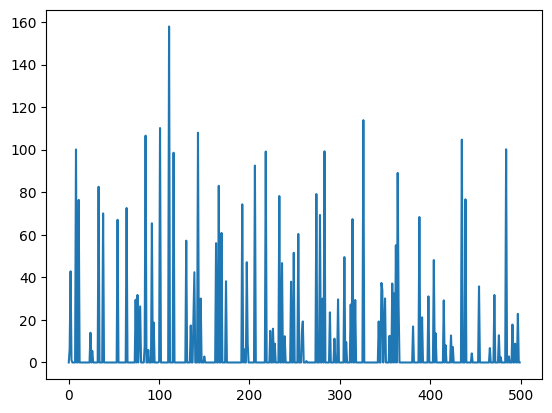

In [668]:
plt.plot(LP_solver_general(A, b, c))

In [669]:
x = cp.Variable(n)
objective = cp.Minimize(c @ x)
contraints = [A @ x == b, x >= 0]
problem = cp.Problem(objective, contraints)
problem.solve()

-5266.444556400706

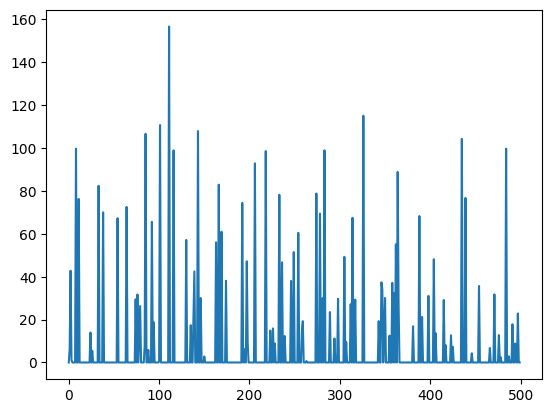

In [670]:
plt.plot(x.value)